Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.97      0.93       683
        True       0.66      0.34      0.45       117

    accuracy                           0.88       800
   macro avg       0.78      0.66      0.69       800
weighted avg       0.86      0.88      0.86       800

Logistic Regression AUC-ROC: 0.6555668180851197
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       683
        True       0.96      0.56      0.70       117

    accuracy                           0.93       800
   macro avg       0.94      0.78      0.83       800
weighted avg       0.93      0.93      0.92       800

Random Forest AUC-ROC: 0.7755815845127705


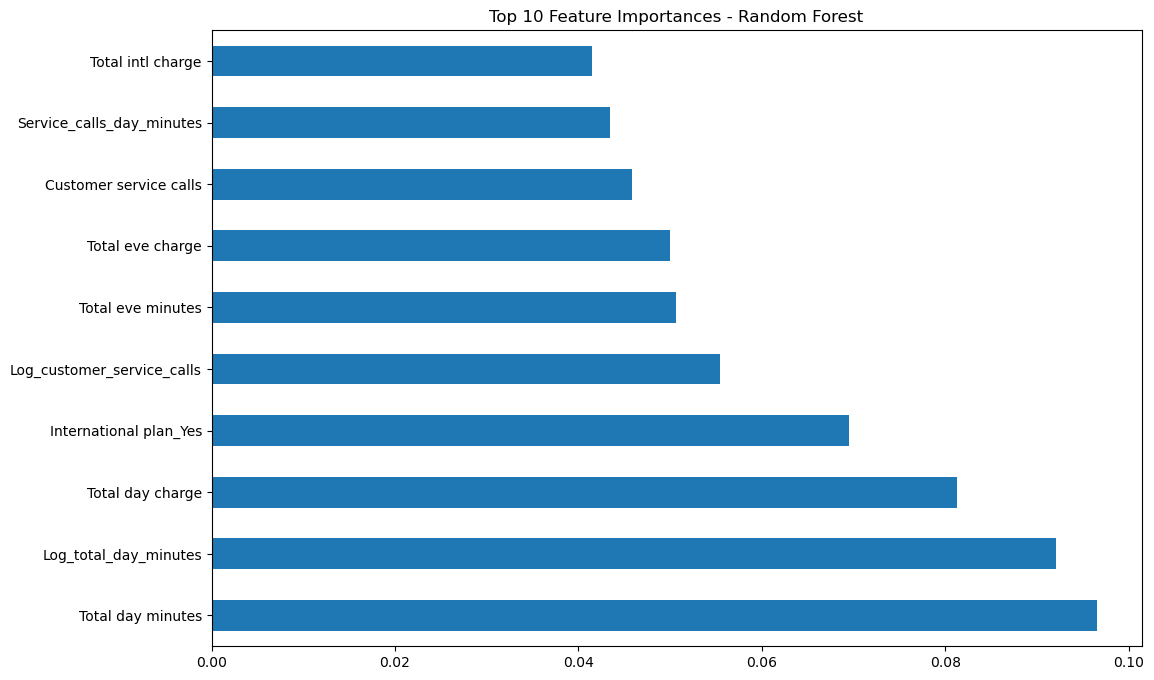

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'churn-bigml-80.csv'
data = pd.read_csv(file_path)
data_encoded = pd.get_dummies(data, columns=['State', 'International plan', 'Voice mail plan', 'Area code'], drop_first=True)
data_encoded['Service_calls_day_minutes'] = data_encoded['Customer service calls'] * data_encoded['Total day minutes']
data_encoded['Log_total_day_minutes'] = np.log1p(data_encoded['Total day minutes'])
data_encoded['Log_customer_service_calls'] = np.log1p(data_encoded['Customer service calls'])
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=2575)
log_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_pred_log))
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()